# 1. Installing python libs

In [1]:
libs = """
tensorflow==2.15.0
opencv-python==4.8.1.78
scikit-learn==1.3.2
matplotlib==3.8.2
pydto==0.5.1
numpy==1.23.5
pandas==2.1.4
protobuf==3.20.*
"""

with open('requirements.txt', 'w') as file:
    file.write(libs)

In [2]:
!pip install -r requirements.txt

# 2. Loading MNIST

In [3]:
import pandas as pd

mnist_dataset_path = 'mnist-dataset/train.csv'
# mnist loaded as a dataframe
mnist_dataset = pd.read_csv(mnist_dataset_path)

In [4]:
# Getting pixels only
pixels = mnist_dataset.iloc[:, 1:785]
# Getting labels only
expected_numbers = mnist_dataset.iloc[:, 0]

# 3. Spliting MNIST into training, validation and testing data

In [5]:
from sklearn.model_selection import train_test_split

# Define the proportions
train_size = 0.7
validation_size = 0.2
test_size = 0.1
random_seed = 505  # just to ensure reproducibility

# First split: 70% for training and 30% for validation + testing
raw_training_inputs, temp_inputs, raw_training_labels, temp_labels = train_test_split(
    pixels, expected_numbers, test_size=(validation_size + test_size), random_state=random_seed
)

# Second split: Divide the 30% into validation and testing
raw_validation_inputs, raw_testing_inputs, raw_validation_labels, raw_testing_labels = train_test_split(
    temp_inputs, temp_labels, test_size=(test_size / (validation_size + test_size)), random_state=random_seed
)

print(f'raw_training_inputs shape: {raw_training_inputs.shape}')
print(f'raw_validation_inputs shape: {raw_validation_inputs.shape}')
print(f'raw_testing_inputs shape: {raw_testing_inputs.shape}')
print(f'raw_training_labels shape: {raw_training_labels.shape}')
print(f'raw_validation_labels shape: {raw_validation_labels.shape}')
print(f'raw_testing_labels shape: {raw_testing_labels.shape}')


raw_training_inputs shape: (29399, 784)
raw_validation_inputs shape: (8400, 784)
raw_testing_inputs shape: (4201, 784)
raw_training_labels shape: (29399,)
raw_validation_labels shape: (8400,)
raw_testing_labels shape: (4201,)


# 4. Reassembling the images by reshaping the dataframes

In [6]:
# The training_inputs DataFrame has 29399 rows x 784 columns, we need to "reassemble" the image as a 28x28 matrix
training_inputs = raw_training_inputs.to_numpy().reshape(29399, 28,28)
print(f'training_inputs: {training_inputs.shape}')

# raw_training_labels Dataframe has 29399 rows x 1 columns, thus, we just need it as a matrix with this format
training_labels = raw_training_labels.values
print('training_labels:', training_labels.shape)

# Doing the same for validation input
validation_inputs = raw_validation_inputs.to_numpy().reshape(8400,28,28)
print(f'validation_inputs: {validation_inputs.shape}')

# Doing the same for validation labels
validation_labels = raw_validation_labels.values
print('validation_labels:', validation_labels.shape)

# Doing the same for testing input
testing_inputs = raw_testing_inputs.to_numpy().reshape(4201, 28,28)
print('testing_inputs:', testing_inputs.shape)

testing_labels = raw_testing_labels.values
print('testing_labels:', testing_labels.shape)

training_inputs: (29399, 28, 28)
training_labels: (29399,)
validation_inputs: (8400, 28, 28)
validation_labels: (8400,)
testing_inputs: (4201, 28, 28)
testing_labels: (4201,)


# 5. Ploting an image to check if data is ok

In [7]:
# Setting pandas to show the very dataframe
pd.set_option('display.max_rows', 28)
pd.set_option('display.max_columns', 28)


testing_index = 1
some_number_to_print = testing_labels[testing_index]
image = testing_inputs[testing_index]
print(f'DATA FRAME OF NUMBER {some_number_to_print}')
pd.DataFrame(image)

DATA FRAME OF NUMBER 3


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,7,7,7,7,93,158,164,98,7,2,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,18,249,254,254,254,254,254,254,254,254,159,95,13,2,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,140,254,254,242,211,112,203,241,254,254,254,254,101,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,11,105,105,36,0,0,0,29,141,229,250,254,213,14,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,156,254,242,21,0,0,0,0,0,0,0


IMAGE OF NUMBER 3


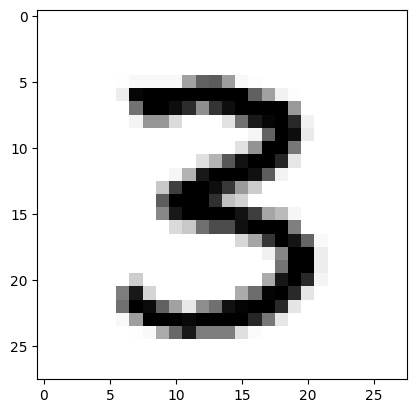

In [8]:
import matplotlib.pyplot as plt

print(f'IMAGE OF NUMBER {some_number_to_print}')
plt.imshow(image, cmap=plt.cm.binary)
plt.show()

# 6. Reshaping inputs and labels to include the color channel

In [9]:
# Our model will deal with images in grayscale. A Grayscale image has only one color channel

image_width = 28
image_height = 28
grayscale_channels = 1

training_inputs_with_channels = training_inputs.reshape(training_inputs.shape[0], image_width, image_height, grayscale_channels)
print(f'training_inputs_with_channels shape: {training_inputs_with_channels.shape}')

validation_inputs_with_channels = validation_inputs.reshape(validation_inputs.shape[0], image_width, image_height, grayscale_channels)
print(f'validation_inputs_with_channels shape: {validation_inputs_with_channels.shape}')

testing_inputs_with_channels = testing_inputs.reshape(testing_inputs.shape[0], image_width, image_height, grayscale_channels)
print(f'testing_inputs_with_channels shape: {testing_inputs_with_channels.shape}')

training_inputs_with_channels shape: (29399, 28, 28, 1)
validation_inputs_with_channels shape: (8400, 28, 28, 1)
testing_inputs_with_channels shape: (4201, 28, 28, 1)


# 7. Normalizing inputs 

In [10]:
# Our grayscale image values goes from 0-255, we can normalize if by dividing all elements by 255
normalized_training_inputs_with_channels = training_inputs_with_channels / 255
normalized_validation_inputs_with_channels = validation_inputs_with_channels / 255
normalized_testing_inputs_with_channels = testing_inputs_with_channels / 255

# 8. Confirming that normalized images are still valid

In [11]:
# Checking images are still ok

testing_index = 1
some_number_to_print = testing_labels[testing_index]
image = normalized_testing_inputs_with_channels[testing_index]
print(f'DATA FRAME OF NUMBER {some_number_to_print}')
image_with_original_shape = image.reshape(28,28)
pd.DataFrame(image_with_original_shape)

DATA FRAME OF NUMBER 3


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.027451,0.027451,0.027451,0.027451,0.364706,0.619608,0.643137,0.384314,0.027451,0.007843,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.070588,0.976471,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.623529,0.372549,0.050980,0.007843,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.549020,0.996078,0.996078,0.949020,0.827451,0.439216,0.796078,0.945098,0.996078,0.996078,0.996078,0.996078,0.396078,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043137,0.411765,0.411765,0.141176,0.000000,0.000000,0.000000,0.113725,0.552941,0.898039,0.980392,0.996078,0.835294,0.054902,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039216,0.611765,0.996078,0.949020,0.082353,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


IMAGE OF NUMBER 3


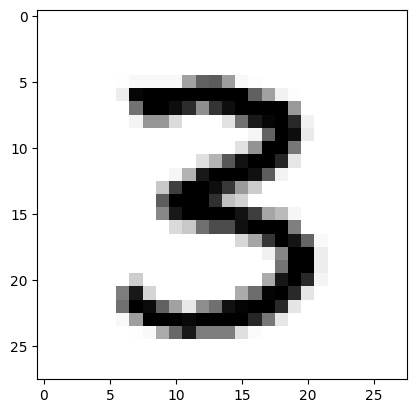

In [12]:
print(f'IMAGE OF NUMBER {some_number_to_print}')
plt.imshow(image_with_original_shape, cmap=plt.cm.binary)
plt.show()

# 9. Building the model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.initializers import VarianceScaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import  sparse_categorical_crossentropy

model = Sequential([
    # To extract features from images
    Conv2D(
        input_shape = (image_width, image_height, grayscale_channels),
        kernel_size = 5,
        filters = 8,
        strides = 1,
        activation = relu,
        kernel_initializer = VarianceScaling(),
    ),
    MaxPooling2D(
        pool_size = (2, 2),
        strides = (2, 2),
    ),
    Conv2D(
        kernel_size = 5,
        filters = 16,
        strides = 1,
        activation = relu,
        kernel_initializer = VarianceScaling(),
    ),
    MaxPooling2D(
        pool_size = (2, 2),
        strides = (2, 2),
    ),

    # To transform collected features into a one dimensional vector
    Flatten(),

    # To learn how to identify numbers from collected data
    Dense(
        units = 128,
        activation = relu,
    ),
    Dropout(0.2),
    Dense(
        units = 10,
        activation = softmax,
        kernel_initializer = VarianceScaling(),
    ),
])

model.compile(
    optimizer = Adam(learning_rate = 0.001),
    loss = sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

model.summary()

2023-12-29 04:50:03.424886: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-29 04:50:03.456109: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-29 04:50:03.456144: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-29 04:50:03.457009: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-29 04:50:03.461935: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-29 04:50:03.462199: I tensorflow/core/platform/cpu_feature_guard.cc:1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

# 10. Training

In [14]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

training_logs = ".training-logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = TensorBoard(log_dir = training_logs, histogram_freq = 1)

training_history = model.fit(
    normalized_training_inputs_with_channels,
    training_labels,
    epochs = 10,
    validation_data = (normalized_validation_inputs_with_channels, validation_labels),
    callbacks = [tensorboard_callback]
)

print("snapmath model trained")

Epoch 1/10
919/919 [==============================] - 6s 6ms/step - loss: 0.3272 - accuracy: 0.8998 - val_loss: 0.0948 - val_accuracy: 0.9723
Epoch 2/10
919/919 [==============================] - 5s 5ms/step - loss: 0.0924 - accuracy: 0.9719 - val_loss: 0.0641 - val_accuracy: 0.9799
Epoch 3/10
919/919 [==============================] - 6s 6ms/step - loss: 0.0658 - accuracy: 0.9794 - val_loss: 0.0571 - val_accuracy: 0.9832
Epoch 4/10
919/919 [==============================] - 7s 7ms/step - loss: 0.0520 - accuracy: 0.9832 - val_loss: 0.0579 - val_accuracy: 0.9824
Epoch 5/10
919/919 [==============================] - 7s 7ms/step - loss: 0.0422 - accuracy: 0.9868 - val_loss: 0.0526 - val_accuracy: 0.9851
Epoch 6/10
919/919 [==============================] - 7s 7ms/step - loss: 0.0372 - accuracy: 0.9875 - val_loss: 0.0490 - val_accuracy: 0.9843
Epoch 7/10
919/919 [==============================] - 7s 7ms/step - loss: 0.0316 - accuracy: 0.9894 - val_loss: 0.0442 - val_accuracy: 0.9881
Epoch 

# 11. Checking accuracy and loss

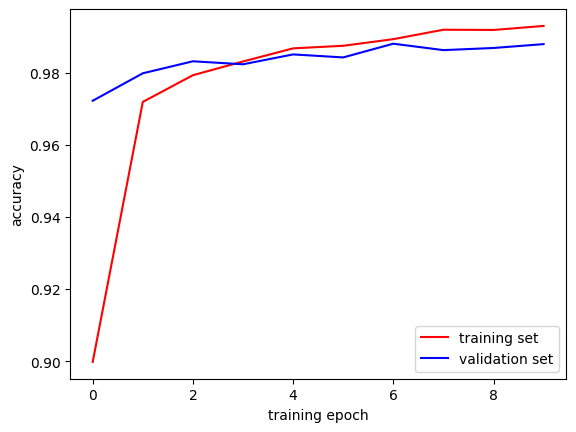

In [15]:
plt.ylabel('accuracy')
plt.xlabel('training epoch')
plt.plot(training_history.history['accuracy'], label = 'training set', color = 'red')
plt.plot(training_history.history['val_accuracy'], label = 'validation set', color = 'blue')
plt.legend()

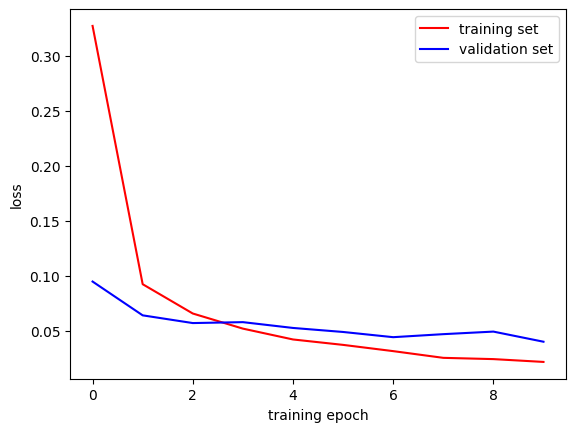

In [16]:
plt.ylabel('loss')
plt.xlabel('training epoch')
plt.plot(training_history.history['loss'], label='training set', color = 'red')
plt.plot(training_history.history['val_loss'], label='validation set', color = 'blue')
plt.legend()

# 12. Evaluating the model using unseen data (testing data)

In [17]:
testing_loss, testing_accuracy = model.evaluate(normalized_testing_inputs_with_channels, testing_labels)
print('Testing loss: ', testing_loss)
print('Testing accuracy: ', testing_accuracy)

132/132 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 0.9876
Testing loss:  0.04220506176352501
Testing accuracy:  0.9876220226287842


# 13. Checking predictions using testing data

132/132 [==============================] - 1s 3ms/step


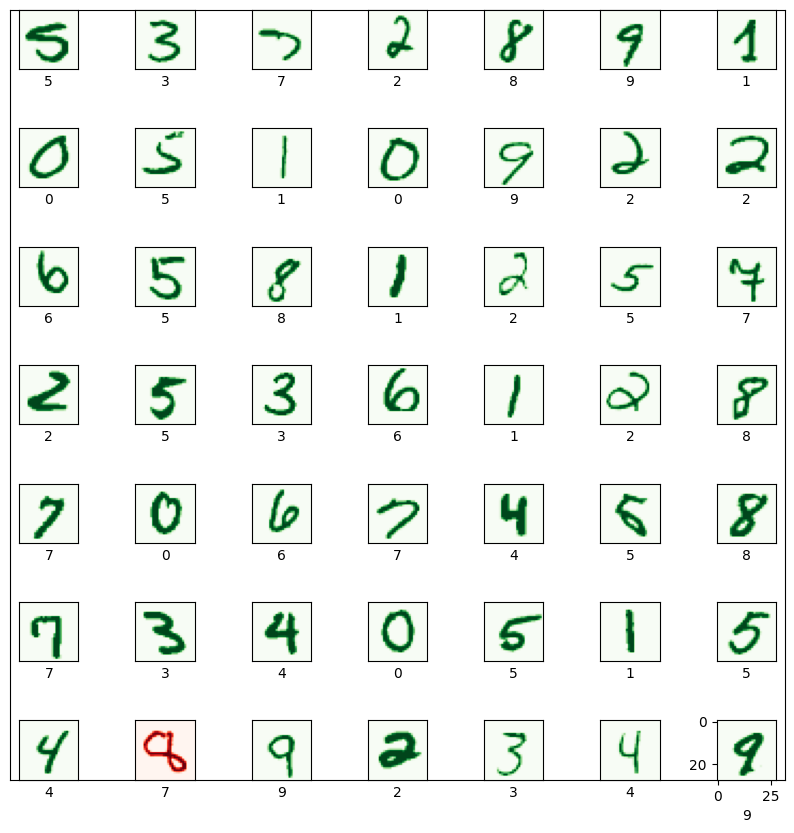

In [18]:
import math
import numpy as np

raw_prediction = model.predict([normalized_testing_inputs_with_channels])
# raw_prediction is a probability distribution for each one of the 10 possible numbers, thus we should get the max probability
predictions = np.argmax(raw_prediction, axis=1)

numbers_to_display = 49
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10, 10))
for index in range(numbers_to_display): 
    predicted_label = predictions[index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.subplot(num_cells, num_cells, index + 1)
    color_map = 'Greens' if predicted_label == testing_labels[index] else 'Reds'
    plt.xlabel(predicted_label)
    plt.imshow(normalized_testing_inputs_with_channels[index].reshape((image_width, image_height)), cmap=color_map)
plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

# 14. Testing the model with a real world example

## 14.1. Loading a colorful number image

Loaded image shape (846, 688, 3)


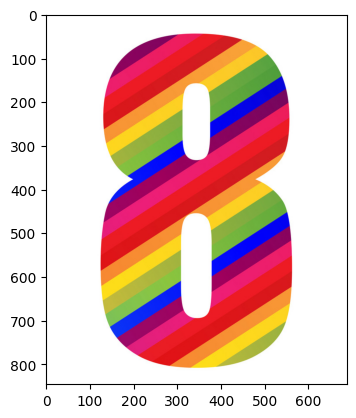

In [19]:
import cv2

#image_path = 'numbers/1.jpeg'
image_path = "numbers/8-2.jpg"
#image_path = "numbers/3-2.png"

img = cv2.imread(image_path)
print(f'Loaded image shape {img.shape}')

# By default OpenCV opens images in BGR, thus, to show it with proper colors with convert it to RGB
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## 14.2. Converting image to grayscale

Loaded image shape (846, 688, 3)


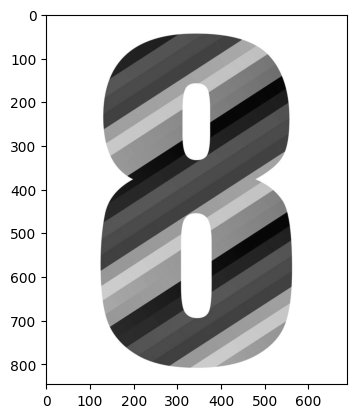

In [20]:
# Above image has colors and uses 3 channels, we need to make it have only 1 channel

img_in_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(f'Loaded image shape {img.shape}')
plt.imshow(img_in_grayscale, cmap='gray')

## 14.3. Reshaping the image to be 28x28

reshaped_grayscale_image shape (28, 28)


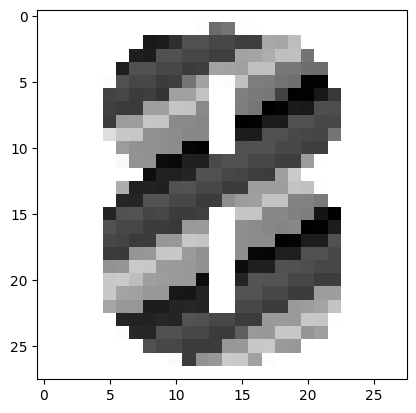

In [21]:
reshaped_grayscale_image = cv2.resize(img_in_grayscale, (28, 28))
print(f'reshaped_grayscale_image shape {reshaped_grayscale_image.shape}')
plt.imshow(reshaped_grayscale_image, cmap='gray')

## 14.4. Checking that the real world are different from how MNIST provides images

In [22]:
# If we print the loaded image as dataframe we can see that "White spaces" are represented by high values (255), while "Black spaces" with low values (0)
pd.DataFrame(reshaped_grayscale_image)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,255,255,253,124,132,253,254,255,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,51,53,70,99,99,91,91,83,83,177,176,196,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,55,53,100,99,91,91,84,83,174,175,183,198,199,131,255,255,255,255,255,255,255
4,255,255,255,255,255,255,55,100,100,91,91,82,83,174,172,170,199,199,134,134,126,124,255,255,255,255,255,255
5,255,255,255,255,255,252,101,91,91,82,83,132,172,253,252,200,139,138,130,128,31,30,255,255,255,255,255,255
6,255,255,255,255,255,88,91,81,83,75,170,171,202,255,255,141,137,134,88,29,30,50,78,255,255,255,255,255
7,255,255,255,255,255,84,81,80,169,169,203,202,150,255,255,139,133,28,31,52,51,98,98,255,255,255,255,255
8,255,255,255,255,255,81,167,168,204,203,151,151,147,255,255,29,30,53,52,99,99,91,92,255,255,255,255,255
9,255,255,255,255,255,225,206,204,156,155,153,149,148,255,255,54,53,99,99,94,91,90,132,255,255,255,255,255


## 14.5. Translating a real world image to the MNIST format

In [23]:
# We can do so by performing a bitwise NOT on all pixels and printing it again as DataFrame, now you'll see it is closer to MNIST's images
bitwised_not_image = cv2.bitwise_not(reshaped_grayscale_image)
print(f"bitwised_not_image shape {bitwised_not_image.shape}")
pd.DataFrame(bitwised_not_image)

bitwised_not_image shape (28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,2,131,123,2,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,204,202,185,156,156,164,164,172,172,78,79,59,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,200,202,155,156,164,164,171,172,81,80,72,57,56,124,0,0,0,0,0,0,0
4,0,0,0,0,0,0,200,155,155,164,164,173,172,81,83,85,56,56,121,121,129,131,0,0,0,0,0,0
5,0,0,0,0,0,3,154,164,164,173,172,123,83,2,3,55,116,117,125,127,224,225,0,0,0,0,0,0
6,0,0,0,0,0,167,164,174,172,180,85,84,53,0,0,114,118,121,167,226,225,205,177,0,0,0,0,0
7,0,0,0,0,0,171,174,175,86,86,52,53,105,0,0,116,122,227,224,203,204,157,157,0,0,0,0,0
8,0,0,0,0,0,174,88,87,51,52,104,104,108,0,0,226,225,202,203,156,156,164,163,0,0,0,0,0
9,0,0,0,0,0,30,49,51,99,100,102,106,107,0,0,201,202,156,156,161,164,165,123,0,0,0,0,0


## 14.6. Normalizing the image

In [24]:
normalized_image = bitwised_not_image / 255
print(f"normalized_image shape {normalized_image.shape}")
pd.DataFrame(normalized_image)

normalized_image shape (28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007843,0.513725,0.482353,0.007843,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.800000,0.792157,0.725490,0.611765,0.611765,0.643137,0.643137,0.674510,0.674510,0.305882,0.309804,0.231373,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.784314,0.792157,0.607843,0.611765,0.643137,0.643137,0.670588,0.674510,0.317647,0.313725,0.282353,0.223529,0.219608,0.486275,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.784314,0.607843,0.607843,0.643137,0.643137,0.678431,0.674510,0.317647,0.325490,0.333333,0.219608,0.219608,0.474510,0.474510,0.505882,0.513725,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.011765,0.603922,0.643137,0.643137,0.678431,0.674510,0.482353,0.325490,0.007843,0.011765,0.215686,0.454902,0.458824,0.490196,0.498039,0.878431,0.882353,0.000000,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.654902,0.643137,0.682353,0.674510,0.705882,0.333333,0.329412,0.207843,0.000000,0.000000,0.447059,0.462745,0.474510,0.654902,0.886275,0.882353,0.803922,0.694118,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.670588,0.682353,0.686275,0.337255,0.337255,0.203922,0.207843,0.411765,0.000000,0.000000,0.454902,0.478431,0.890196,0.878431,0.796078,0.800000,0.615686,0.615686,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.682353,0.345098,0.341176,0.200000,0.203922,0.407843,0.407843,0.423529,0.000000,0.000000,0.886275,0.882353,0.792157,0.796078,0.611765,0.611765,0.643137,0.639216,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.117647,0.192157,0.200000,0.388235,0.392157,0.400000,0.415686,0.419608,0.000000,0.000000,0.788235,0.792157,0.611765,0.611765,0.631373,0.643137,0.647059,0.482353,0.0,0.0,0.0,0.0,0.0


## 14.7. Inputing the processed image

In [25]:
input = normalized_image.reshape(1, 28,28, 1)
print(f"input shape {input.shape}")
prediction = model.predict(input)
predicted_number = np.argmax(prediction, axis=1)
print(f'PREDICTED NUMBER = {predicted_number}')

input shape (1, 28, 28, 1)
1/1 [==============================] - 0s 96ms/step
PREDICTED NUMBER = [8]


# 15. Exporting the model

In [26]:
import time

ts = int(time.time())
file_path = f"./snapmath-model/{ts}/"
model.save(filepath = file_path)

INFO:tensorflow:Assets written to: ./snapmath-model/1703825473/assets


INFO:tensorflow:Assets written to: ./snapmath-model/1703825473/assets


# 16. Testing a prediction with model loaded

In [27]:
from tensorflow.saved_model import load

model_name = file_path
loaded_snapmath_model = load(model_name)

In [28]:
from tensorflow import constant, float32

x = loaded_snapmath_model(constant(input, dtype=float32))
print(x)
predicted = np.argmax(x, axis=1)[0]
print(f"LOADED MODEL PREDICTED {predicted}")

tf.Tensor(
[[0.00753224 0.01321298 0.04657273 0.22381209 0.01563676 0.17502819
  0.0313876  0.00548174 0.46897456 0.01236107]], shape=(1, 10), dtype=float32)
LOADED MODEL PREDICTED 8
